(linear_regress)=
# Linear regression
```{index} Linear regression
```
## Theory
Linearity refers to a linear relationship between two or more variables. Linear regression aims to predict the dependent variable value (\\(y\\)) based on a given independent variable (\\(x\\)). Therefore, linear regression finds out a linear relationship between \\(x\\) and \\(y\\).

With noisy data or multiple different measurements of \\(y\\) at a given value of \\(x\\), we may not be able to fit a function/curve that goes through all points exactly. Therefore, in linear regresssion the aim is to find a function that best approximates the data but does not necessarily go through all the points.

### Simple linear regression
Plotting the independent variable \\(x\\) on the x-axis and dependent variable \\(y\\) on the y-axis, linear regression gives us a straight line with equation:
\\[y=b_0+b_1x,\\]
where \\(b_0\\) is the intercept and \\(b_1\\) is the slope of the line. The \\(x\\) and \\(y\\) variables remain the same as the data points cannot change, however, the intercept (\\(b_0\\)) and slope (\\(b_1\\)) can be modified to obtain the most optimal value for the intercept and the slope. The linear regression algorithm fits multiple lines on the data points and returns the line that results in the smallest error. This may be achieved by minimising the sum of the squares of the differences to the data, known as a least squares approximation.

[<img src="https://s3.amazonaws.com/acadgildsite/wordpress_images/Data+Science/2Linear+regression+Case+Study+2/blogs+LR+2+pic+1.png" style="width:300px;"/>](https://acadgild.com/blog/2linear-regression-case-study-2)

Figure 1: Plot of scatter points in 2D space (blue) and line that results in the least error (red).

### Multiple linear regression
This can be extended to multiple linear regression where there are more than two variables. In this scenario, the dependent variable is dependent upon several independent variables \\(x= (x_1, …, x_n)\\) where \\(n\\) is the number of variables. You can assume a linear relationship between \\(x\\) and \\(y\\) with the regression equation:
\\[y=b_0+b_1x_1+b_2x_2+b_3x_3+…b_nx_n +\epsilon,\\]
where \\(b_0,b_1,...,b_n\\) are the regression coefficients and \\(\epsilon\\) is the random error.

### Root-mean-square error
```{index} Root-mean-square error
```
There are many methods to evaluate the performance of the linear regression algorithm. Two commonly used methods are the [root-mean-square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (RMSE) and the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (\\(R^2\\) score).

RMSE is the square root of the sum of all errors squared divided by the number of values. The equation for the RMSE is:
\\[RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y_i} - y_i)^2},\\]
where \\(\hat{y_1}, \hat{y_2}, ..., \hat{y_n}\\)  are the predicted values, \\(y_1, y_2, ..., y_n\\) are the observed values and \\(n\\) is the number of observations.

### Coefficient of determination
```{index} Coefficient of determination
```
The coefficient of determinaion is a statistical measure of how close the data are to the linear regression line.

\\[R^2 = \frac{\text{Explained variation}}{\text{Total variation}}.\\]

\\(R^2\\) is therefore always between 0 and 100%. The higher the \\(R^2\\), the better the model fits the data. 

\\(R^2\\) is defined as follows:
\\[R^2 = 1-\frac{SS_r}{SS_t},\\\\\\
SS_r=\sum_{i=1}^{n} ({y_i} - \hat{y_i})^2,\\\\\\
SS_t=\sum_{i=1}^{n} ({y_i} - \bar{y_i})^2.\\]

\\(SS_r\\) is the sum of squared regression and represents the variation explained by the linear regression model.

\\(SS_t\\) is the sum of squared yotal and represents the total variation in the data.

\\(y_1, y_2, ..., y_n\\) are the observed values, \\(\hat{y_1}, \hat{y_2}, ..., \hat{y_n}\\)  are the predicted values of \\(y\\), and \\(\bar{y_1}, \bar{y_2}, ..., \bar{y_n}\\) are the mean values of \\(y\\).

Based on the above equation the \\(R^2\\) score usually ranges from 0 to 1, but can be negative if the model is completely wrong.

### Least  squares error calculation

Least squares fitting minimises the sum of the squares of the differences between the data provided and the polynomial approximation. In other words it minimises the folowing expression:

\\[E=\sum_{i=0}^{N} (P(x_i) - y_i)^2,\\]

where \\(E\\) is the squared error, \\(P(x_i)\\) is the value of the polynomial function that has been fit to the data evaluated at point \\(x_i\\), and \\(y_i\\) is the \\(i^{th}\\) data value.

[<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/440px-Linear_least_squares_example2.svg.png" style="width:300px;"/>](https://en.wikipedia.org/wiki/Linear_least_squares)

Figure 2: A plot of the data points (red), the least squares line of best fit (blue), and the residuals (green).

In this calulation we are computing the sum of the squares of the distances indicated in green in Figure 1.

## Implementation of linear regression in Python
### Simple example - submarine landslide size in the North Atlantic

In [1]:
# Some imports needed for linear regression in python

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si
import scipy.stats as ss

# Some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

In this example we are attempting to fit a linear best fit line to the data `length_width.dat` in log-log space. This file contains the lengths and widths of submarine landslides in the North Atlantic basin from Fig. 7 in [Huhnerbach & Masson (2004)](https://www.sciencedirect.com/science/article/pii/S0025322704002774).

Firstly, we will use `numpy.polyfit` in order to carry out the least squares error calculation to fit a linear polynomial. Next, we will use `scipy.stats.linregress` to perform linear regression using a [SciPy](https://www.scipy.org/) implementation of linear regression. Then, we will compare the slope and the intercept (the two coefficients in the linear polynomial) between the two approaches.

The coefficient of determination is also determined by default from the linear regression calculation. To check these values agree we will also calculate the \\(R^2\\) value using the `numpy.polyfit` data.

Let's define a function to evaluate squared error:

In [2]:
# Function to evaluate the squared error
def sqr_error(p, xi, yi):
    
    """"Function to evaluate the sum of square of errors"""
    
    # Compute the square of the differences
    diff2 = (p(xi)-yi)**2
    
    # Return their sum
    return diff2.sum()

Open a file and store data in arrays:

In [3]:
file = open("length_width.dat", 'r')

xi = []
yi = []

for line in file:
    xi.append(float(line.split()[0]))
    yi.append(float(line.split()[1]))
    
xi = np.array(xi)
yi = np.array(yi)

Perform linear regression and plot the results:

Lagrange polynomial coefficients = [1.0266104  0.37698383]
R^2 value calculated from Lagrange polynomial fit to the data in log-log space = 0.5653751967433511

Linear regression: slope, intercept, r_value = 1.02661040, 0.37698383, 0.75191435
R^2 = 0.56537520


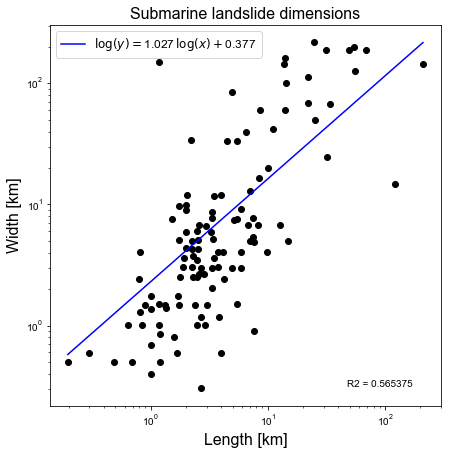

In [4]:
# Set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 7))

# Plot the raw data
ax1.loglog(xi, yi, 'ko')

# Fit a linear line to the log of the data using numpy.polyfit
logxi = np.log(xi)
logyi = np.log(yi)
poly_coeffs = np.polyfit(logxi, logyi, 1)

# Construct the corresponding polynomial function from these coefficients
p1 = np.poly1d(poly_coeffs)
# print the polynomial coefficients to compare with regression
print('Lagrange polynomial coefficients = {}'.format(poly_coeffs))

#Calculate and print an R-squared value for this fit using the mathematical
# definition from https://en.wikipedia.org/wiki/Coefficient_of_determination
SS_res = sqr_error(p1, logxi, logyi)
SS_tot = np.sum((np.mean(logyi) - logyi)**2)
r2 = 1. - SS_res/SS_tot
print('R^2 value calculated from Lagrange polynomial fit to the data in log-log space = {}\n'.format(r2))

# Only need two points to plot the regression
x = np.linspace(min(xi), max(xi), 2)
ax1.loglog(x, p1(x), 'b', label='$\log(y) = $%.3f$\,\log(x) + $%.3f' %
           (poly_coeffs[0], poly_coeffs[1]))
ax1.legend(loc='best', fontsize=12)

# Check values computed above against scipy's linear regression
slope, intercept, r_value, p_value, std_err = ss.linregress(logxi, logyi)
print('Linear regression: slope, intercept, r_value = {0:.8f}, {1:.8f}, {2:.8f}'\
      .format(slope, intercept, r_value))
print('R^2 = {:.8f}'.format(r_value**2))

ax1.set_title('Submarine landslide dimensions', fontsize=16)
ax1.set_xlabel('Length [km]', fontsize=16)
ax1.set_ylabel('Width [km]', fontsize=16)

ax1.text(0.76, 0.05, 'R2 = %.6f' % r2, transform=ax1.transAxes)

plt.show()

### Polynomial curve fitting

Curve fitting is popular to use for datasets containing noise. To fit these curves of varying polynomial degree we can again use the least squares error calculation.

Using `numpy.polyfit` we can fit curves of varying polynomial degree to the data points. This is demonstrated below.

In [5]:
# Data points
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Let's set up some space to store all the polynomial coefficients
# there are some redundancies here, and we have assumed we will only 
# consider polynomials up to degree N
N = 6
poly_coeffs = np.zeros((N, N))

for i in range(N):
    poly_coeffs[i, :(i+1)] = np.polyfit(xi, yi, i)

print('poly_coeffs = \n{}'.format(poly_coeffs))

poly_coeffs = 
[[ 0.5         0.          0.          0.          0.          0.        ]
 [ 0.0508044   0.26714649  0.          0.          0.          0.        ]
 [ 0.02013603 -0.13983999  0.55279339  0.          0.          0.        ]
 [-0.00552147  0.09889271 -0.43193108  0.75909819  0.          0.        ]
 [-0.00420655  0.07403681 -0.38492428  0.59251888  0.27906056  0.        ]
 [-0.00301599  0.06536037 -0.49614427  1.59623195 -2.08266478  1.20030166]]


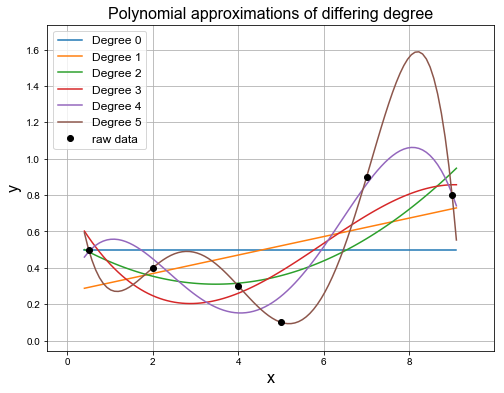

In [6]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

x = np.linspace(0.4, 9.1, 100)

for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    ax1.plot(x, p(x), label='Degree %i' % i)

ax1.plot(xi, yi, 'o', color="black", label="raw data")

plt.legend(loc='best', fontsize = 12)
plt.title('Polynomial approximations of differing degree', fontsize=16)
plt.grid(True)
plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.show()

Using the above function that evaluates the squared error, we can evaluate the error for each of the polynomials calculated above.

In [7]:
for i in range(N):
    p = np.poly1d(poly_coeffs[i, :(i+1)])
    print('Square of the difference between the data and the '
          'polynomial of degree {0:1d} = {1:.8e}.'.format(i, sqr_error(p, xi, yi)))

Square of the difference between the data and the polynomial of degree 0 = 4.60000000e-01.
Square of the difference between the data and the polynomial of degree 1 = 3.32988992e-01.
Square of the difference between the data and the polynomial of degree 2 = 1.99478242e-01.
Square of the difference between the data and the polynomial of degree 3 = 1.57303437e-01.
Square of the difference between the data and the polynomial of degree 4 = 4.69232378e-02.
Square of the difference between the data and the polynomial of degree 5 = 1.75525473e-26.


As can be seen above the error drops as we approximate the data with higher degree polynomials.

For some inspiration on multiple linear regression, you can look at ["A beginner's guide to linear regression in Python with Scikit-Learn"](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) and ["Linear regression case study"](https://acadgild.com/blog/2linear-regression-case-study-2).

## References
* Information in this notebook is compiled based on ACSE-3 (Numerical Methods), Lecture 1: Interpolation and Curve Fitting
* V. Huhnerbach, D.G. Masson, Landslides in the North Atlantic and its adjacent seas: an analysis of their morphology, setting and behaviour, Marine Geology 213 (2004) 343 – 362.
* Real Python - ["Linear regression in Python"](https://realpython.com/linear-regression-in-python/)
* Towards Data Science - ["A beginner's guide to linear regression in Python with Scikit-Learn"](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f) and ["What does RMSE really mean?"](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e)
* Acadgild - ["Linear regression case study"](https://acadgild.com/blog/2linear-regression-case-study-2)
